In [3]:
#!pip install "pyglet<2"
import pyglet

import warnings
warnings.filterwarnings("ignore", message="Could not set COM MTA mode")

import io
import asyncio
from IPython.display import display
import ipywidgets as widgets
from PIL import Image
import trimesh as tri

def get_images(callback):
    def on_file_upload(change):
        images = []
        for uploaded_filename, uploaded_file in change['new'].items():
            content = uploaded_file['content']
            image = Image.open(io.BytesIO(content))
            images.append(image)
        display(*images)
        callback(images)

    file_uploader = widgets.FileUpload(accept='image/*', multiple=True)
    file_uploader.observe(on_file_upload, names='value')

    display(file_uploader)
    
import generator as gen

# all the actual stuff goes here
def generate(images):
    # send these into generative model
    print("Generating")
    mesh = gen.generate(images)
    mesh.show() # ideally add as a view in here but notebooks suck and cant run async or show 2 views in 1 cell
    print("Outputting as output.stl")
    with open("output.stl", "wb") as f:
        mesh.export(file_obj="output.stl", file_type="stl")
    print("Done")

def run():
    get_images(generate)

# * <br>
# * <br>
# * <br>
# * <br>
# * <br>
# * <br>
# * <br>
# * <br>
# Interface

FileUpload(value={}, accept='image/*', description='Upload', multiple=True)

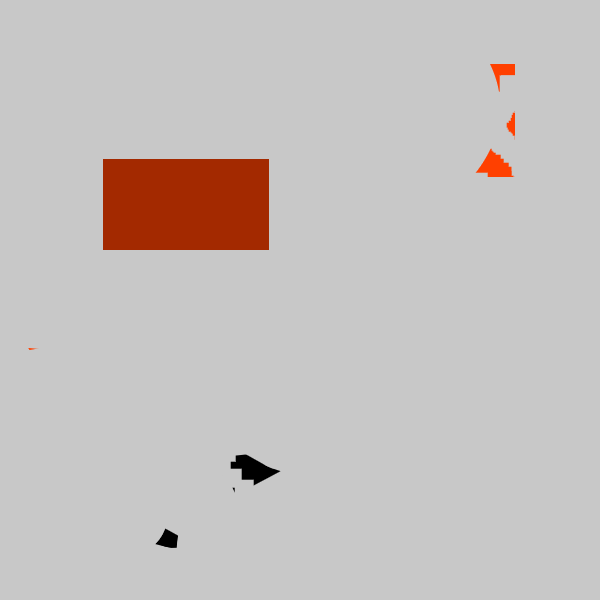

Generating
Outputting as output.stl
Done


In [4]:
run()